In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import glob
import os
import zipfile
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

553476096/553467096 [==============================] - 4s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________

In [2]:
# convert to Sequential model, omit the last layer
# this works with VGG16 because the structure is linear
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [3]:
# set trainable=False for all layers
# we don't want to train them again
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [4]:
# add a last classification layer for our use case with 5 classes
model.add(layers.Dense(2))

In [5]:

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:

path_to_zip_file = "/content/DS_IDRID.zip"
directory_to_extract_to = "/content/data"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [8]:
# Reorganize the folder structure:

BASE_DIR = "/content/data/DS_IDRID/"
if not os.path.isdir(BASE_DIR + 'Train/NONDR'):
      os.makedirs(BASE_DIR + 'Train/NONDR')
if not os.path.isdir(BASE_DIR + 'Train/DR'):
      os.makedirs(BASE_DIR + 'Train/DR')

if not os.path.isdir(BASE_DIR + 'Test/DR'):
      os.makedirs(BASE_DIR + 'Test/NONDR')
if not os.path.isdir(BASE_DIR + 'Test/DR'):
      os.makedirs(BASE_DIR + 'Test/DR')


In [9]:

image_list = []
for filename in glob.glob(BASE_DIR+'Train/*-0.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Train/NONDR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [10]:

image_list = []
for filename in glob.glob(BASE_DIR+'Train/*-3.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Train/DR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [11]:
image_list = []
for filename in glob.glob(BASE_DIR+'Train/*-4.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Train/DR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [12]:
image_list = []
for filename in glob.glob(BASE_DIR+'Test/*-0.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Train/NONDR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [13]:
image_list = []
for filename in glob.glob(BASE_DIR+'Test/*-4.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Test/DR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [14]:
image_list = []
for filename in glob.glob(BASE_DIR+'Test/*-3.jpg'):
    im=Image.open(filename)
    image_list.append([im,filename])
for img in image_list:
  image_path = BASE_DIR+ "Test/DR"
  image = img[0]
  image = image.save(f"{image_path}/"+ img[1].split("/")[-1])

In [ ]:
# get the preprocessing function of this model
preprocess_input = tf.keras.applications.vgg16.preprocess_input

Horizontal flips as data augmention methode

In [32]:
train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.1, ,horizontal_flip=True,)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True)

In [33]:
train_batches = train_gen.flow_from_directory(
    '/content/data/DS_IDRID/Train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=["NONDR", "DR"]   
)

test_batches = test_gen.flow_from_directory(
    '/content/data/DS_IDRID/Test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=["NONDR", "DR"] 
)

Found 291 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [34]:
train_batches.shuffle

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------sample of traning dataset------------


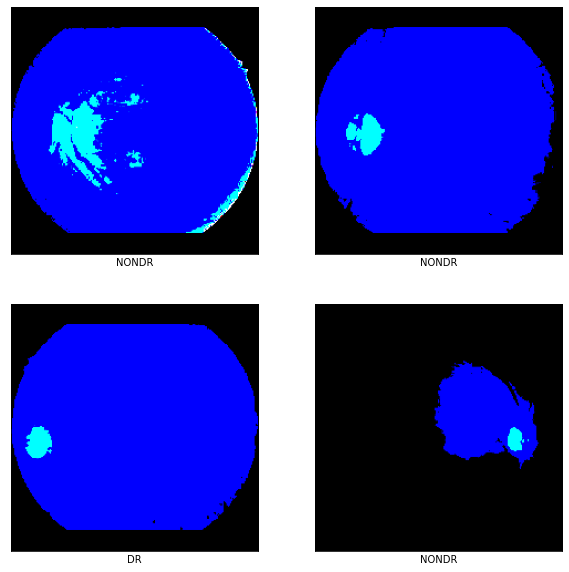

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------end-sample of traning dataset--------
------sample of testing dataset------------


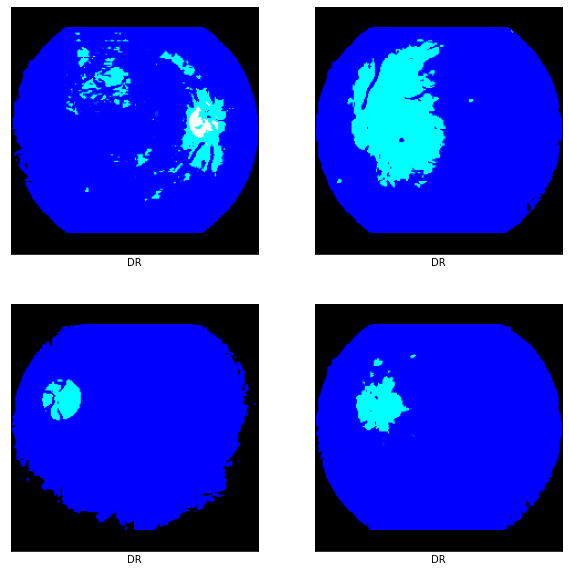

------end-sample of testing dataset--------


In [35]:
import matplotlib.pyplot as plt
names = ["NONDR", "DR"] 
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()
print("------sample of traning dataset------------")
show(train_batches[0])
print("------end-sample of traning dataset--------")

print("------sample of testing dataset------------")
show(test_batches[0])
print("------end-sample of testing dataset--------")

In [36]:
epochs = 5

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

model.fit(train_batches, 
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)
model.save("/content/model", overwrite=True)

Epoch 1/5
73/73 - 154s - loss: 0.3054 - accuracy: 0.8625
Epoch 2/5
73/73 - 151s - loss: 0.1743 - accuracy: 0.9072
Epoch 3/5
73/73 - 151s - loss: 0.1318 - accuracy: 0.9588
Epoch 4/5
73/73 - 151s - loss: 0.1456 - accuracy: 0.9450
Epoch 5/5
73/73 - 152s - loss: 0.0904 - accuracy: 0.9622
INFO:tensorflow:Assets written to: /content/model/assets


In [37]:
model.evaluate(test_batches, verbose=2)

8/8 - 17s - loss: 0.0973 - accuracy: 0.9688


[0.09725573658943176, 0.96875]